# 1. Introdução

A relação entre o consumo de energia e o crescimento econômico tem sido um tópico de grande interesse e relevância no âmbito das pesquisas sobre desenvolvimento sustentável e políticas energéticas. Neste estudo, buscamos explorar e quantificar a correlação entre o consumo de energia primária e o Produto Interno Bruto (PIB) per capita, representando, respectivamente, a demanda por energia e o nível de renda de uma nação. Não obstante, avaliaremos se o nível de renda (PIB per capita) se relaciona à participação de fontes renováveis no total do consumo de energia. <br>

A fundamentação teórica apoia-se no conceito de que, à medida que a renda de um país aumenta, seu consumo de energia tende a crescer, impulsionado por uma maior demanda industrial, comercial e doméstica, o que por conseguinte, exige um maior uso de energia. A energia é um pilar fundamental para o desenvolvimento econômico, e um aumento na renda per capita geralmente reflete em um aumento no padrão de vida e, consequentemente, em um maior consumo de energia. Concomitantemente, a ampliação e investimentos em renováveis em uma determinada economia deveria colaborar para o seu desenvolvimento econômico, por meio da geração de empregos, maior produção nacional de energia e menor dependência de combustíveis fósseis estrangeiros. <br>

Usando o modelo Cobb-Douglas, para desecrever a produção - sendo energia como um elemento vinculado à K - e o princípio de equilíbrio do mercado, temos que um maior consumo, acarretado pelo crescimento da renda, aumenta a produção. No longo prazo, onde K será variável, isso implica em mais energia dispendida na fabricação e disponibilização de bens e serviços. <br>

\begin {equation}
Y = A \cdot K^{\alpha} \cdot L^{\beta}
\end {equation}

Neste estudo, o modelo de demanda por energia examina a relação entre o PIB e o consumo de energia. A ideia central é que a demanda por energia não é apenas uma função do tamanho e do crescimento da economia, mas também de outros fatores como a eficiência energética, políticas governamentais, avanços tecnológicos e mudanças no comportamento dos consumidores. No entanto, o foco deste projeto está em entender até que ponto a renda, medida pelo PIB per capita, influencia essa demanda.<br>

**Fonte:** Global Data on Sustainable Energy <br>
https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy 

# 2. Carga das Ferramentas

In [243]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

In [244]:
# Carregando o dataset
path_dataset = r'https://raw.githubusercontent.com/Felipefalex/Projeto-Sustainable-Energy/main/global-data-on-sustainable-energy%20(1).csv'
data = pd.read_csv(path_dataset)

# Exibindo as primeiras linhas do dataset para inspeção inicial
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


# 3. Análise dos Dados

A primeira fase do projeto é a análise da estrutura dos dados: quais são as informações disponíveis, como estão elencadas e qual seu comportamento.

In [245]:
# Tamanho do dataset e tipos de dados de cada coluna
dataset_info = data.info()
print(dataset_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [246]:
# Quantidade e nome dos países
nomes_paises = data['Entity'].unique()
quantidade_paises = len(data['Entity'].unique())

print('Temos', quantidade_paises, 'em nosso dataframe, sendo a lista completa deles: \n', nomes_paises)

Temos 176 em nosso dataframe, sendo a lista completa deles: 
 ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bermuda' 'Bhutan' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Guiana' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan'
 'Kazakhstan' 'Keny

Observamos que o dataset possui um volume gigantesco de informações, muitas das quais não precisamos.
Por isso, vamos criar um novo dataframe a partir dele, selecionando apenas as colunas que irão interessar para a nossa análise

In [247]:
# Dataframe reduzido
colunas_reduzidas = ['Entity', 'Year', 'Primary energy consumption per capita (kWh/person)', 'gdp_per_capita', 'Renewable energy share in the total final energy consumption (%)']
data = data[colunas_reduzidas]

# Alterando o nome das colunas
data.columns = ['Pais', 'Ano', 'Consumo energia primaria per capita', 'PIB per capita', 'Renováveis %']

In [248]:
# Avaliando a quantidade de valores nulos
nulos = pd.DataFrame(data.isnull().sum().sort_values(ascending=False)[:25])
nulos = nulos.rename(columns = {0 : 'Null Values'})
print(nulos)

                                     Null Values
PIB per capita                               282
Renováveis %                                 194
Pais                                           0
Ano                                            0
Consumo energia primaria per capita            0


In [249]:
# Calculando o número de informações faltantes por país para cada coluna de interesse
colunas_interesse = ['Pais', 'Ano', 'Consumo energia primaria per capita', 'PIB per capita', 'Renováveis %']
valores_faltantes_pais = data[colunas_interesse].isnull().sum(axis=1).groupby(data['Pais']).sum()
valores_faltantes_pais = valores_faltantes_pais.sort_values(ascending=False)

# Exibindo o total de dados faltantes por coluna
print(valores_faltantes_pais.head(20))

Pais
Saint Vincent and the Grenadines    22
Egypt                               22
Slovakia                            22
Congo                               22
Czechia                             22
Bahamas                             22
Saint Lucia                         22
Saint Kitts and Nevis               22
Gambia                              22
Kyrgyzstan                          22
Yemen                               22
Albania                             21
Somalia                             14
Nauru                               11
Eritrea                             10
Cayman Islands                       7
South Sudan                          6
Afghanistan                          3
Aruba                                3
New Caledonia                        2
dtype: int64


In [250]:
# Remoção das informações faltantes
# Lista de países a serem removidos
paises_a_remover = [
    "Saint Vincent and the Grenadines", "Egypt", "Slovakia",
    "Congo", "Czechia", "Bahamas", "Saint Lucia",
    "Saint Kitts and Nevis", "Gambia",  "Kyrgyzstan",  
    "Yemen", "Albania", "Somalia", "Nauru",
    "Eritrea", "Cayman Islands", "South Sudan", 
]

# Removendo os países especificados do dataframe
data = data[~data['Pais'].isin(paises_a_remover)]

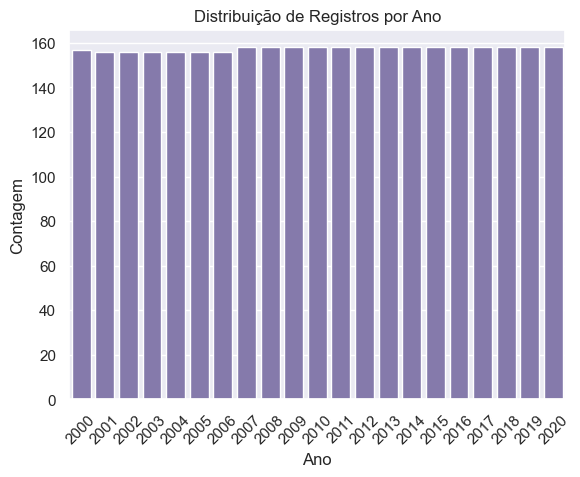

,count,mean,std,min,25%,50%,75%,max
Ano,3305.0,2010.0,6.0,2000.0,2005.0,2010.0,2015.0,2020.0
Consumo energia primaria per capita,3305.0,26642.0,36029.0,0.0,3133.0,13959.0,34099.0,262586.0
PIB per capita,3297.0,13145.0,19355.0,112.0,1354.0,4592.0,15838.0,123514.0
Renováveis %,3148.0,33.0,30.0,0.0,7.0,25.0,55.0,96.0


In [251]:
# Estatísticas descritivas das variáveis numéricas
estatisticas_numericas = data.describe().round(0).T

# Visualização da distribuição das principais variáveis categóricas
# Distribuição de registros por ano
sns.countplot(x=data['Ano'], color='m')
plt.title('Distribuição de Registros por Ano')
plt.ylabel('Contagem')
plt.xlabel('Ano')
plt.xticks(rotation=45)

plt.show()

estatisticas_numericas

**Analisando as estatísticas básicas**

Uma breve varredura dos principais indicadores de nossa base de dados mostra que temos dados bastante dispersos e desiguais.

A participação das renováveis no consumo de energia, por exemplo, que tem uma média global de 32,6%, varia de 0% a 96% entre os países analisados.  

O PIB per capita, conforme se sabe, é também bastante desigual entre os vários países, com um desvio padrão bastante alto, de US$ 19.709 para uma média de US$ 13.284

E o consumo de nergia primaria per capita possui valores extremamente dispersos, com média de 26.642 kWh/pessoa

Os dados abrangem de 2000 a 2020. A distribuição de registros por ano é bastante uniforme, indicando que a maioria dos anos tem uma quantidade similar de dados.

In [252]:
# Definindo as variáveis chave para uso futuro no código
variáveis_chave = ['Consumo energia primaria per capita', 'PIB per capita', 'Renováveis %']

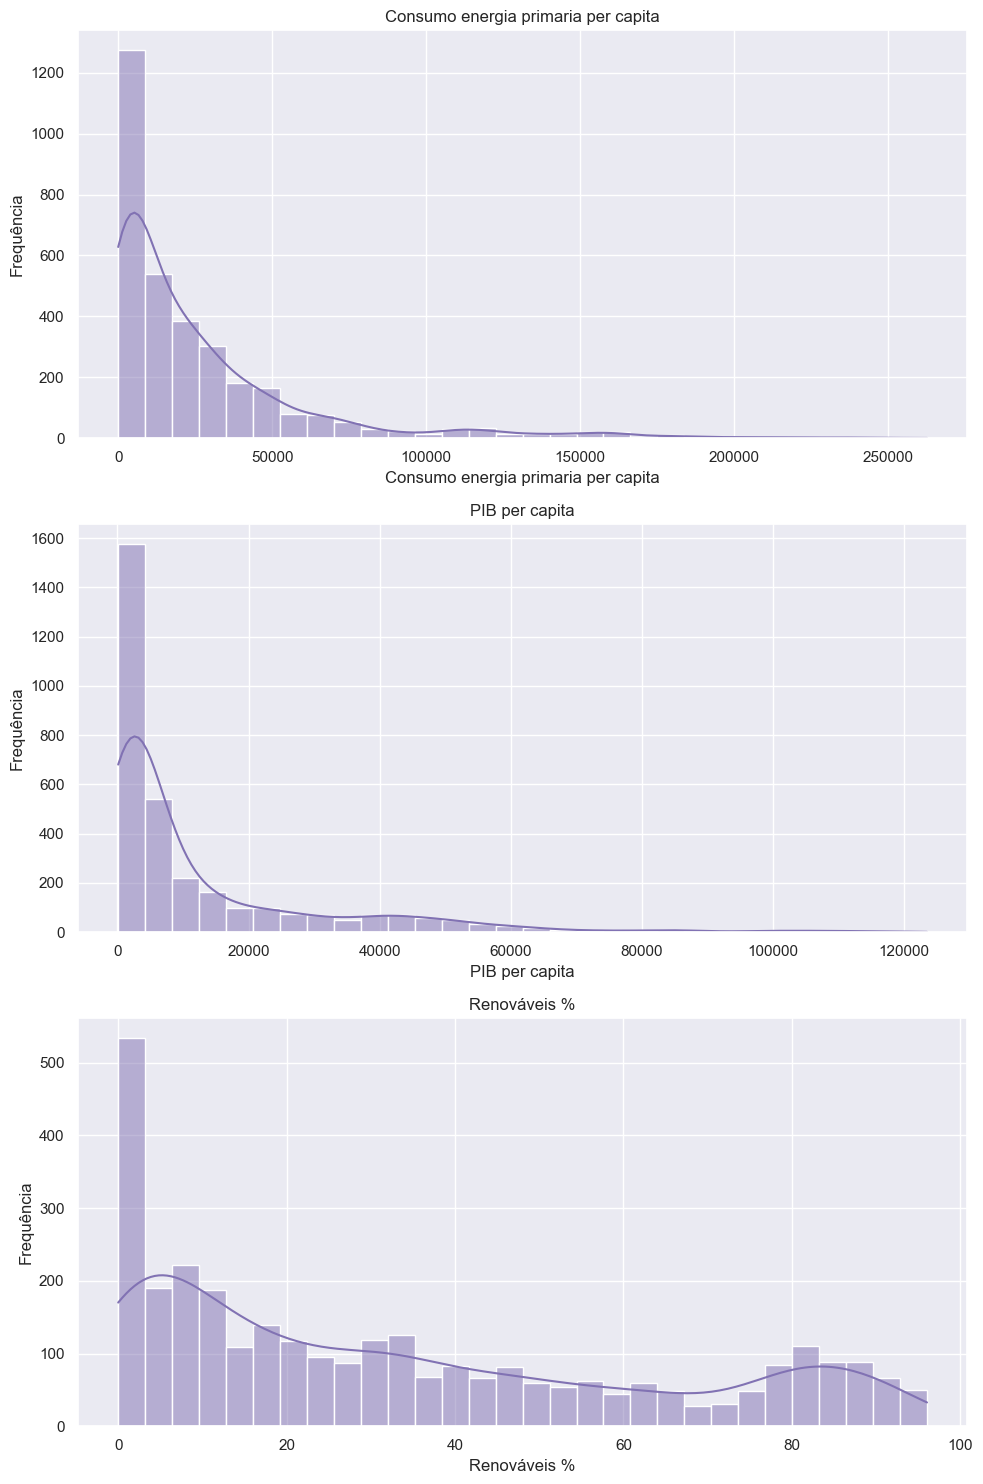

In [253]:
# Visualização Gráfica das Principais Variáveis
# Criando histogramas para cada variável selecionada
fig, axes = plt.subplots(len(variáveis_chave), 1, figsize=(10, 5 * len(variáveis_chave)))

for i, col in enumerate(variáveis_chave):
    sns.histplot(data[col], bins=30, ax=axes[i], kde=True, color='m')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

Há uma assimetria à direita para os dados analisados, isso indica que a vasta maioria dos países possuem baixo consumo de energia primária per capita e baixo PIB per capita. A assimetria se repete no dado de uso de energia renovável, porém com maior dispersão do que nos outros casos. 

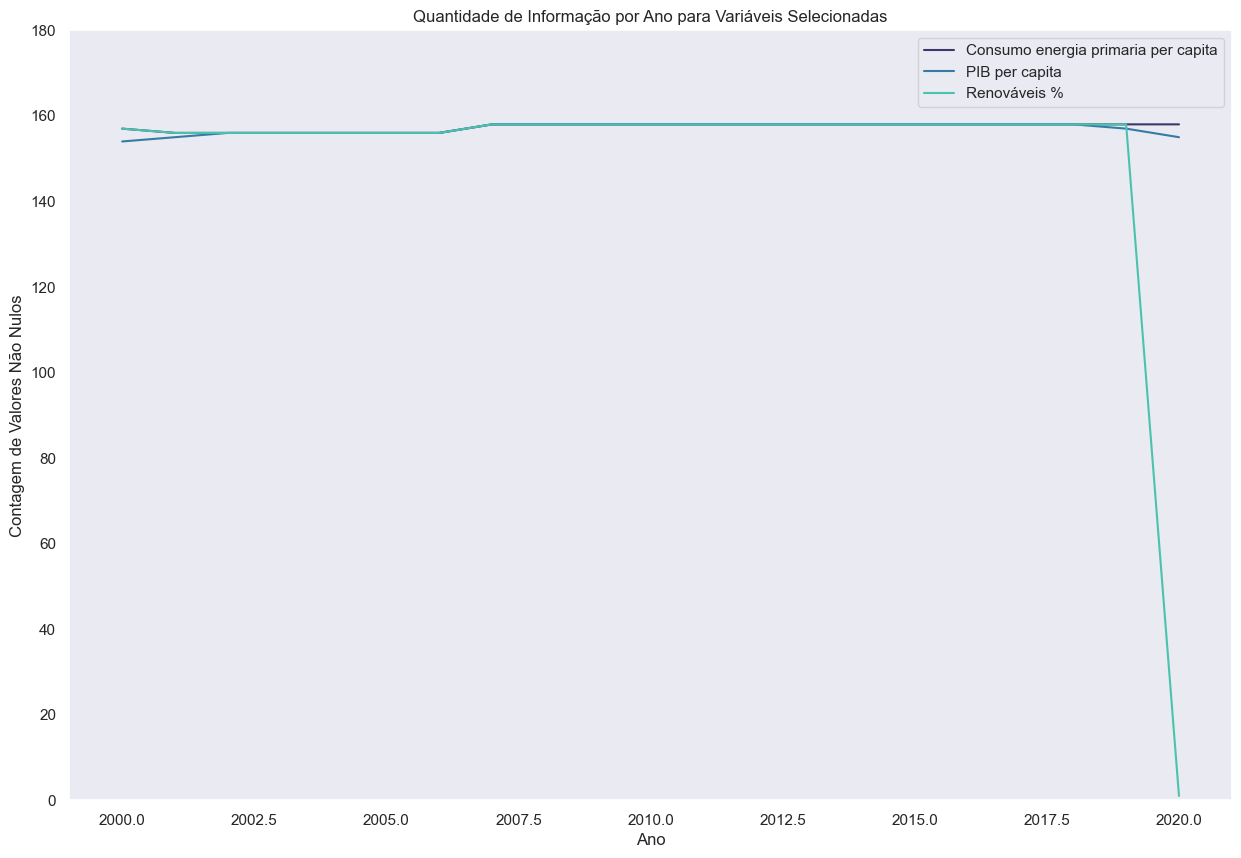

In [254]:
# Contagem de informações não nulas por ano para cada variável
contagem_info = data.groupby('Ano')[variáveis_chave].count()

# Definindo a paleta de cores do seaborn
cores = sns.color_palette("mako", len(variáveis_chave))

# Plotando o gráfico
plt.figure(figsize=(15, 10))
for var, color in zip(variáveis_chave, cores):
    plt.plot(contagem_info.index, contagem_info[var], label=var, color=color)

plt.xlabel('Ano')
plt.ylabel('Contagem de Valores Não Nulos')
plt.ylim(bottom=0, top=180)
plt.title('Quantidade de Informação por Ano para Variáveis Selecionadas')
plt.legend()
plt.grid(False)
plt.show()

Não temos dados do percentual de uso de energia renovável para 2020, portanto iremos remover esse ano de nossa análise.

In [255]:
data = data[data['Ano'] != 2020]

In [256]:
# Calculando a quantidade de informações não nulas por país para as variáveis-chave
quantidade_info_por_pais = data.groupby('Pais')[variáveis_chave].count().sum(axis=1)

# Ordenando os países pela quantidade de informações não nulas, do maior para o menor
paises_por_quantidade_info = quantidade_info_por_pais.sort_values(ascending=False)

# Exibindo os resultados
print(paises_por_quantidade_info)

Pais
Latvia             60
North Macedonia    60
Nepal              60
Netherlands        60
New Caledonia      60
                   ..
Aruba              59
Afghanistan        58
Serbia             39
Montenegro         39
French Guiana       2
Length: 159, dtype: int64


C:\Users\Felipe\AppData\Local\Temp\ipykernel_22208\1608519834.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


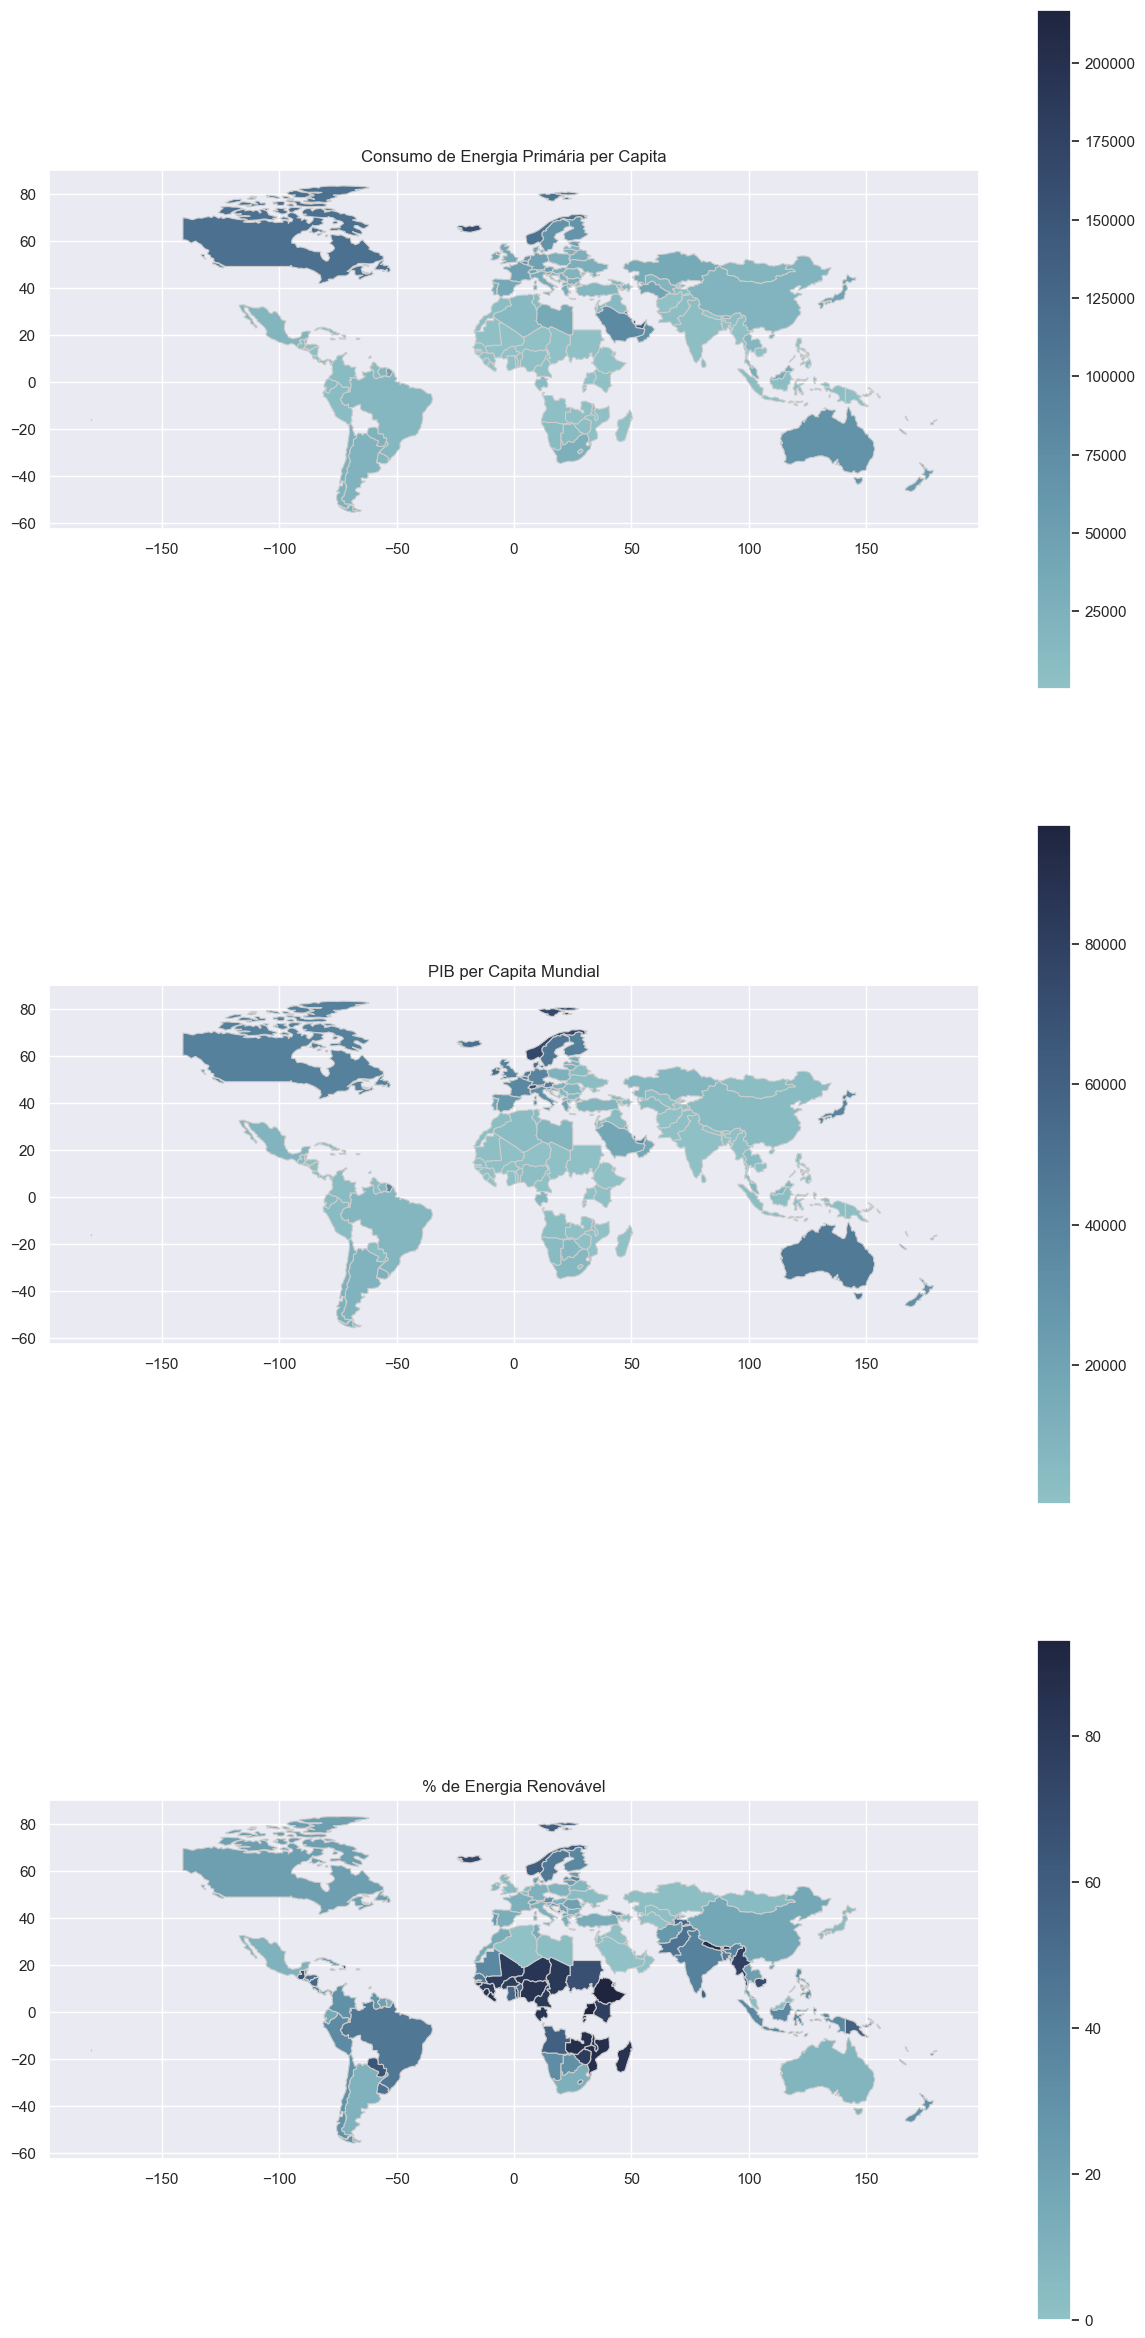

In [257]:
# Carregando um mapa mundial
mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Definindo a paleta de cores
cores_mapa = sns.cubehelix_palette(rot=-.25, light=.7, as_cmap=True)

# Calculando a média do uso de energia primária per capita por país
media_uso_energia_primaria_per_capita = data.groupby('Pais')['Consumo energia primaria per capita'].mean()
uso_energia_mundial = mundo.set_index('name').join(media_uso_energia_primaria_per_capita)

# Calculando a média do PIB per capita por país
media_pib_per_capta = data.groupby('Pais')['PIB per capita'].mean()
pib_per_capta_mundial = mundo.set_index('name').join(media_pib_per_capta)

# Calculando a média do percentual de energia renovável por país
media_energia_renovavel = data.groupby('Pais')['Renováveis %'].mean()
energia_renovavel_mundial = mundo.set_index('name').join(media_energia_renovavel)

# Plotando os mapas
fig, axs = plt.subplots(3, 1, figsize=(15, 30))

# Mapa do Consumo de Energia Primária per Capita
uso_energia_mundial.plot(column='Consumo energia primaria per capita',
                         cmap=cores_mapa,
                         linewidth=0.8,
                         ax=axs[0],
                         edgecolor='0.8',
                         legend=True)
axs[0].set_title('Consumo de Energia Primária per Capita')

# Mapa do PIB per Capita Mundial
pib_per_capta_mundial.plot(column='PIB per capita',
                           cmap=cores_mapa,
                           linewidth=0.8,
                           ax=axs[1],
                           edgecolor='0.8',
                           legend=True)
axs[1].set_title('PIB per Capita Mundial')

# Mapa do Percentual de Energia Renovável
energia_renovavel_mundial.plot(column='Renováveis %',
                               cmap=cores_mapa,
                               linewidth=0.8,
                               ax=axs[2],
                               edgecolor='0.8',
                               legend=True)
axs[2].set_title('% de Energia Renovável')

plt.show()

# 4. Verificação da Hipótese - Premissas

In [258]:
# Segregação de países emergentes e desenvolvidos
emergentes_list = ['Brazil', 'India', 'China', 'Russia', 'South Africa', 'Mexico', 'Indonesia', 'Saudi Arabia', 'Turkey', 'Argentina', 'Thailand']
desenvolvidos_list = ['United States', 'Japan', 'Germany', 'United Kingdom', 'France', 'Canada', 'Italy', 'Australia', 'Netherlands', 'Switzerland', 'Sweden']

emergentes = data[data['Pais'].isin(emergentes_list)].reset_index(drop=True)
desenvolvidos = data[data['Pais'].isin(desenvolvidos_list)].reset_index(drop=True)

# 4. Verificação da Hipótese - Correlação

Vamos começar a investigação dos dados fazendo uma análise de correlação entre o `Percentual de Energia Renovável` o  `PIB per capta` e o `Crescimento do PIB` 

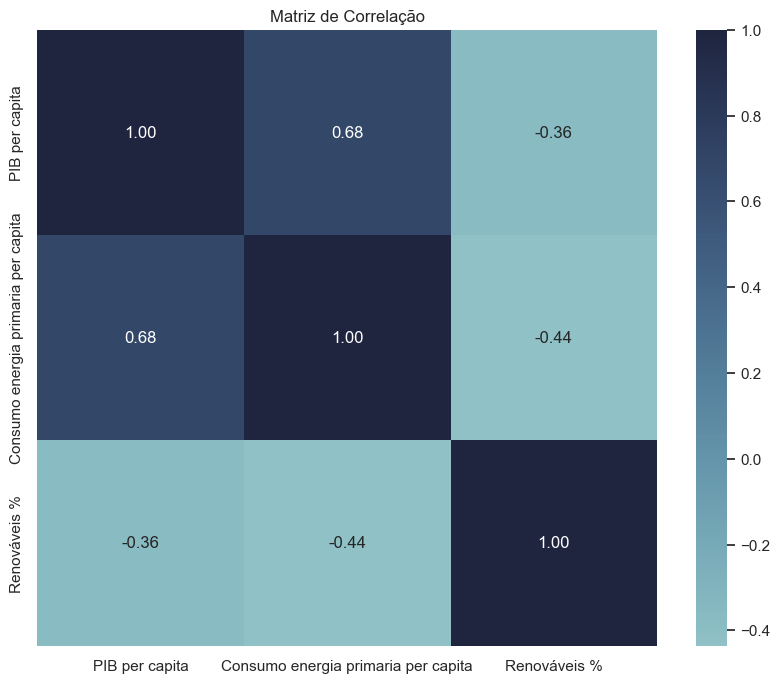

In [259]:
# Matriz de correlação
matriz_correlacao = data[['PIB per capita', 'Consumo energia primaria per capita', 'Renováveis %']].corr()

# Criando matrizes de correlação
cores_mapa = sns.cubehelix_palette(rot=-.25, light=.7, as_cmap=True)
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap=cores_mapa, fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

A matriz sugere correlação positiva forte entre as variáveis, ou seja, ambos tendem a oscilar no mesmo sentido <br>

# 4. Verificação da Hipótese - Regressão Linear

In [260]:
# Filtrando o dataset para os últimos 5 anos (2014-2019)
data_recente = data[data['Ano'] >= 2014]

# Variável independente
x_var = 'PIB per capita'

# Variável dependente
y_var = 'Consumo energia primaria per capita'

# Preparando os dados
data_filtrada = data_recente[[x_var, y_var, 'Pais', 'Renováveis %']].dropna()

data_filtrada['Status'] = data_filtrada['Pais'].apply(lambda x: 'Emergente' if x in emergentes_list else ('Desenvolvido' if x in desenvolvidos_list else 'Outro'))

# Filtrando apenas emergentes e desenvolvidos
data_filtrada = data_filtrada[data_filtrada['Status'] != 'Outro']

# Criando e ajustando o modelo
X = data_filtrada[[x_var]]
y = data_filtrada[y_var]
model = LinearRegression()
model.fit(X, y)

# Coeficiente beta
beta = model.coef_[0]

# Fazendo previsões
y_pred = model.predict(X)

# Calculando R²
r2 = r2_score(y, y_pred)

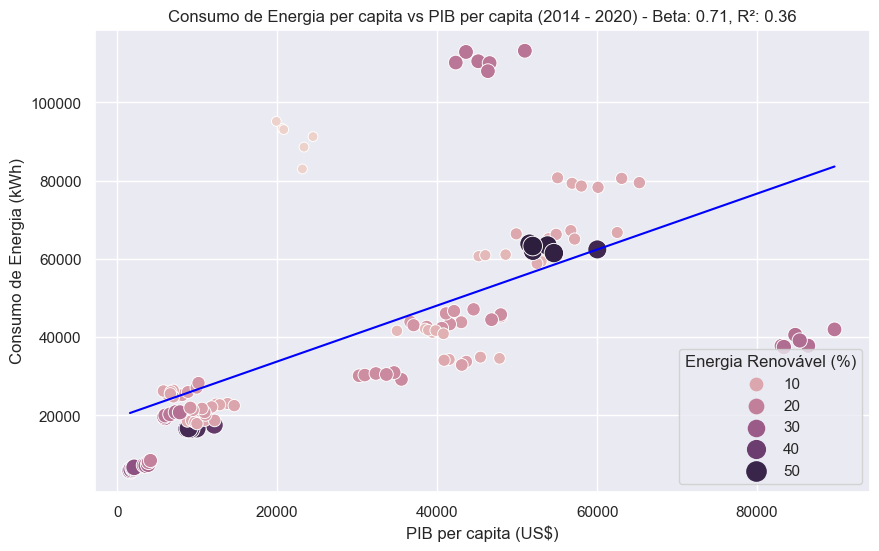

In [261]:
# Plotando gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 6))

sns.scatterplot(data=data_filtrada, x=X[x_var], y=y, hue='Renováveis %', size='Renováveis %', sizes=(50, 200))
sns.lineplot(x=X[x_var], y=y_pred, color='blue')

plt.title(f'Consumo de Energia per capita vs PIB per capita (2014 - 2020) - Beta: {beta:.2f}, R²: {r2:.2f}')
plt.xlabel('PIB per capita (US$)')
plt.ylabel('Consumo de Energia (kWh)')
plt.legend(title='Energia Renovável (%)')
plt.show()

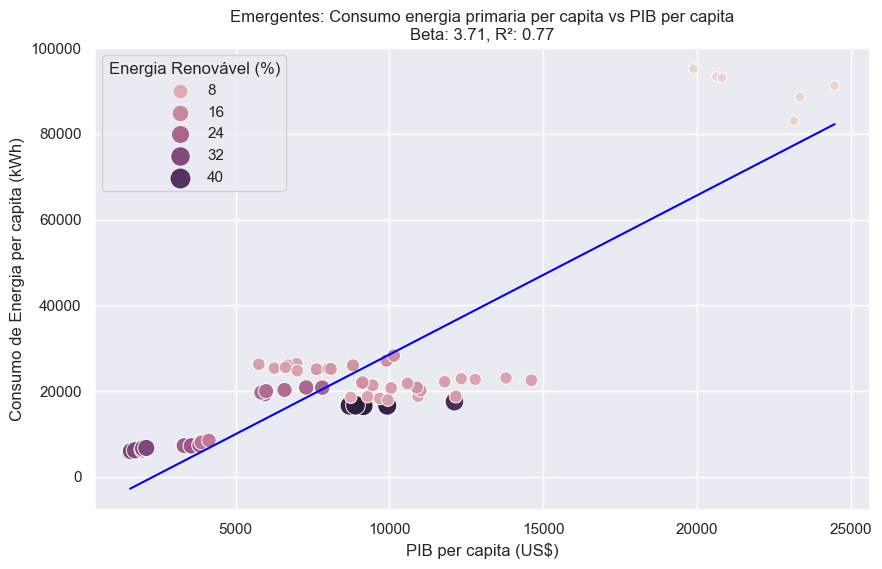

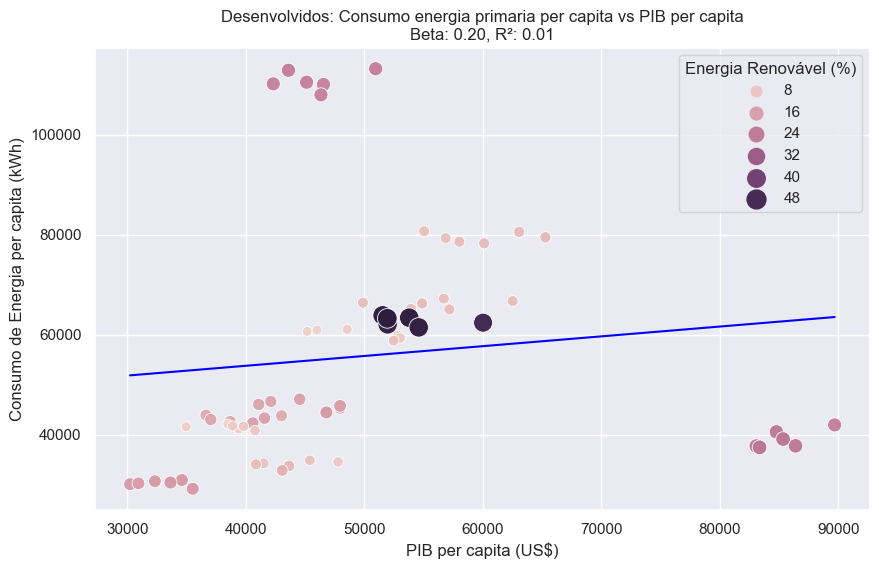

In [262]:
# Função para plotar a regressão, onde data será o dataframe e grupo, o grupo requerido
def plot_regression(data, grupo):
    X = data[[x_var]]
    y = data[y_var]
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    beta = model.coef_[0]
    r2 = r2_score(y, y_pred)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=X[x_var], y=y, hue='Renováveis %', size='Renováveis %', sizes=(50, 200))
    sns.lineplot(x=X[x_var], y=y_pred, color='blue')
    plt.title(f'{grupo}: {y_var} vs {x_var}\nBeta: {beta:.2f}, R²: {r2:.2f}')
    plt.xlabel('PIB per capita (US$)')
    plt.ylabel('Consumo de Energia per capita (kWh)')
    plt.legend(title='Energia Renovável (%)')
    plt.show()

# Plotando regressão para países emergentes
data_emergentes = data_filtrada[data_filtrada['Status'] == 'Emergente']
plot_regression(data_emergentes, 'Emergentes')

# Plotando regressão para países desenvolvidos
data_desenvolvidos = data_filtrada[data_filtrada['Status'] == 'Desenvolvido']
plot_regression(data_desenvolvidos, 'Desenvolvidos')

Olhando para os gráficos, temos

# 4. Verificação da Hipótese - Análise Temporal

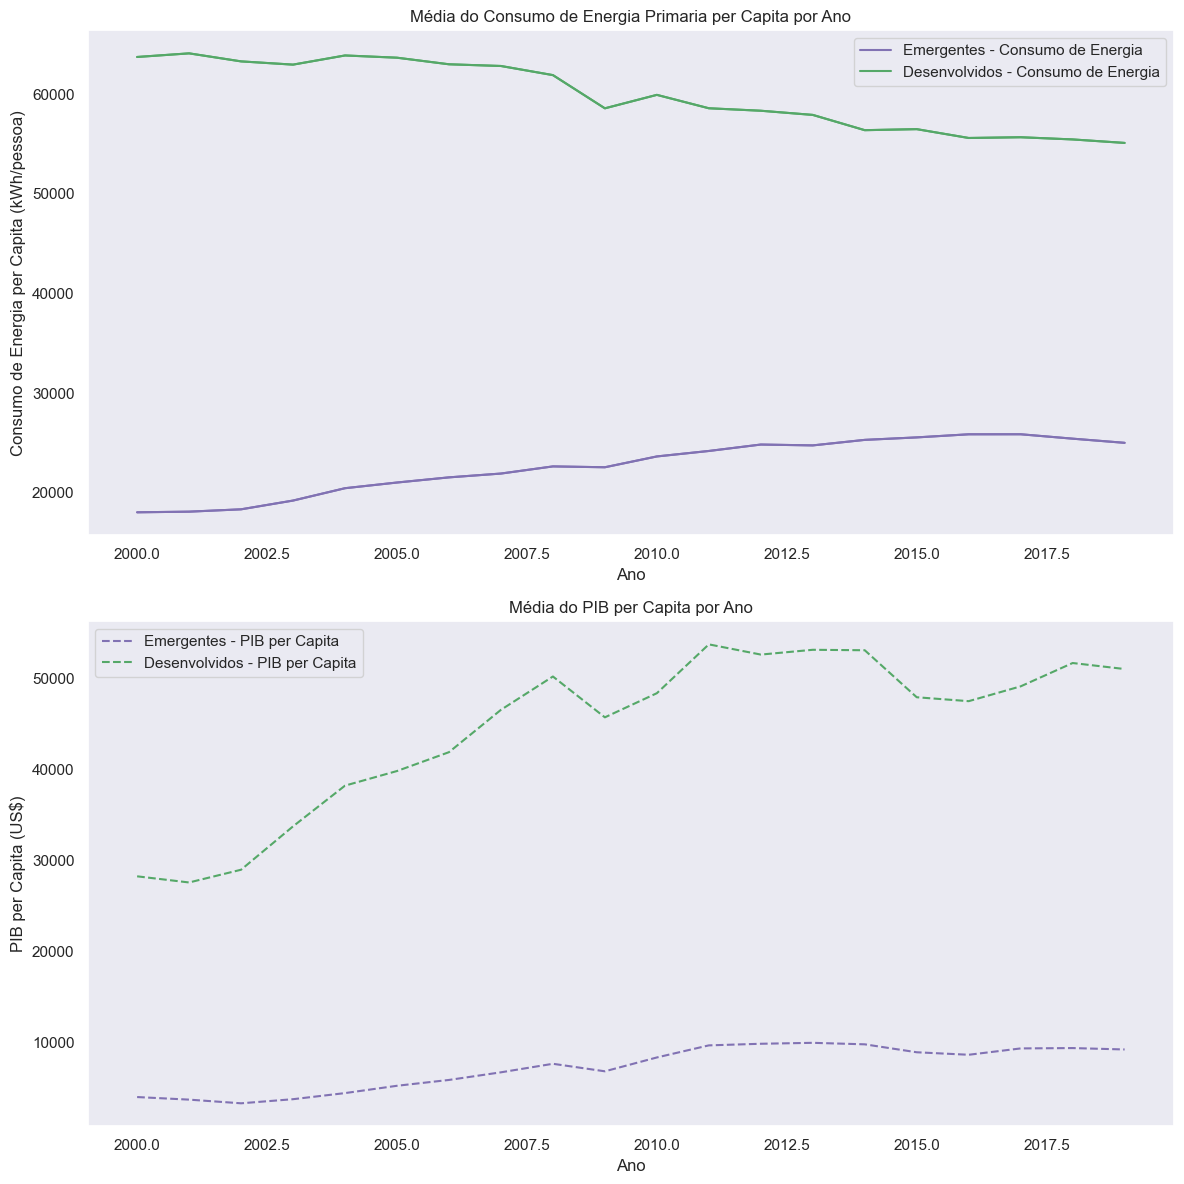

In [263]:
# Filtrando os dados para emergentes e desenvolvidos
data_emergentes = data[data['Pais'].isin(emergentes_list)]
data_desenvolvidos = data[data['Pais'].isin(desenvolvidos_list)]

# Calculando a média do PIB por ano para cada grupo
media_pib_emergentes = data_emergentes.groupby('Ano')['PIB per capita'].mean()
media_pib_desenvolvidos = data_desenvolvidos.groupby('Ano')['PIB per capita'].mean()

# Calculando a média do consumo de energia por ano para cada grupo
media_consumo_emergentes = data_emergentes.groupby('Ano')['Consumo energia primaria per capita'].mean()
media_consumo_desenvolvidos = data_desenvolvidos.groupby('Ano')['Consumo energia primaria per capita'].mean()

# Criando o gráfico com dois subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Gráfico para o consumo de energia per capita
ax[0].plot(media_consumo_emergentes, label='Emergentes - Consumo de Energia', color='m')
ax[0].plot(media_consumo_desenvolvidos, label='Desenvolvidos - Consumo de Energia', color='g')
ax[0].set_title('Média do Consumo de Energia Primaria per Capita por Ano')
ax[0].set_xlabel('Ano')
ax[0].set_ylabel('Consumo de Energia per Capita (kWh/pessoa)')
ax[0].legend()
ax[0].grid(False)

# Gráfico para o PIB per capita
ax[1].plot(media_pib_emergentes, label='Emergentes - PIB per Capita', color='m', linestyle='--')
ax[1].plot(media_pib_desenvolvidos, label='Desenvolvidos - PIB per Capita', color='g', linestyle='--')
ax[1].set_title('Média do PIB per Capita por Ano')
ax[1].set_xlabel('Ano')
ax[1].set_ylabel('PIB per Capita (US$)')
ax[1].legend()
ax[1].grid(False)

plt.tight_layout()
plt.show()

plt.show()

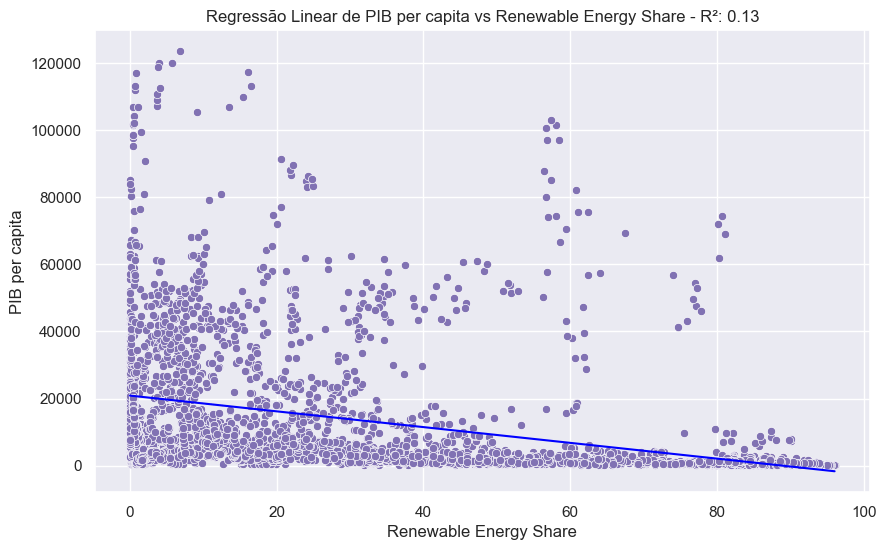

In [264]:
# Variável independente
x_var = 'Renováveis %'

# Variáveis dependentes
y_vars = ['PIB per capita']

# Regressão Linear Univarida para cada variável dependente
for y_var in y_vars:
    # Preparando os dados
    data_filtrada = data[[x_var, y_var]].dropna()
    X = data_filtrada[[x_var]]
    y = data_filtrada[y_var]

    # Criando e ajustando o modelo
    model = LinearRegression()
    model.fit(X, y)

    # Fazendo previsões
    y_pred = model.predict(X)

    # Calculando R²
    r2 = r2_score(y, y_pred)

    # Plotando gráfico de dispersão com linha de regressão
    sns.set_theme(style="darkgrid")
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X[x_var], y=y, color='m')
    sns.lineplot(x=X[x_var], y=y_pred, color='blue')
    plt.title(f'Regressão Linear de {y_var} vs Renewable Energy Share - R²: {r2:.2f}')
    plt.xlabel('Renewable Energy Share')
    plt.ylabel(y_var)
    plt.show()

Uma primeira tentativa de tentar correlacionar o desenvolvimento econômico, medido pelo nível de renda, e energias renováveis, com base na base de dados global, parece nos indicar, de maneira um tanto imprecisa e dispersa, uma relação negativa, conforme é possível ver no gráfico.

Ou seja: quanto maior o nível de energias limpas na matriz, menor a renda.

**1. Verificando a hipótese para países emergentes**

Por conta das altas dispersões desta base de dados, entretando, trabalharemos, com grupos de países que tenham maior semelhança econômica entre si, de maneira a podermos testar melhor a hipótese, com menos distorções.

Primeiramente, vamos testar um grupo das principais economias emergentes.

Para isso, criamos um grupo com as 10 maiores economias emergentes (a lista segue o [ranking](https://https://databankfiles.worldbank.org/public/ddpext_download/GDP.pdf) das maiores economias do mundo em 2022 do Banco Mundial)

In [265]:
Emergentes = data[data['Pais'].isin(['Brazil','India', 'China', 'Russia', 'South Africa', 'Mexico', 'Indonesia', 'Saudi Arabia', 'Turkey', 'Argentina', 'Thailand'])]
Emergentes.describe()

,Ano,Consumo energia primaria per capita,PIB per capita,Renováveis %
count,200.000000,200.000000,200.000000,200.000000
mean,2009.500000,22712.298592,7205.231105,20.226250
std,5.780751,20432.404872,5286.778678,14.432038
min,2000.000000,3469.836400,443.314194,0.010000
25%,2004.750000,13090.687125,3137.781417,10.185000
50%,2009.500000,18298.084500,6657.850856,14.130000
75%,2014.250000,23057.876000,9713.209308,32.512500
max,2019.000000,95158.550000,25243.602000,48.920000


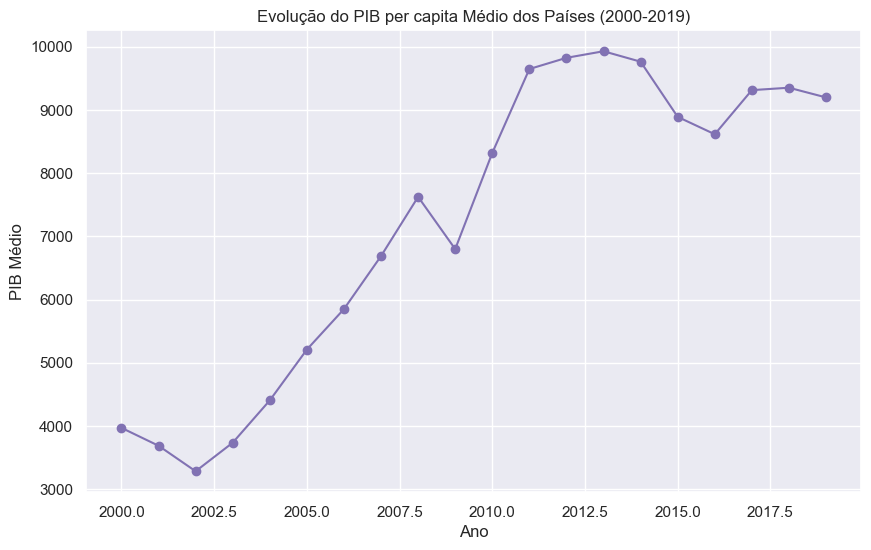

In [266]:
# Calculando o PIB per capita médio do grupo por ano
pib_medio = Emergentes.groupby('Ano')['PIB per capita'].mean()

# Calculando a % de renováveis média por ano
renovaveis_media = Emergentes.groupby('Ano')['Renováveis %'].mean()

# Plotar o gráfico da evolução do PIB
plt.figure(figsize=(10, 6))
plt.plot(pib_medio.index, pib_medio.values, marker='o', linestyle='-', color='m')
plt.title('Evolução do PIB per capita Médio dos Países (2000-2019)')
plt.xlabel('Ano')
plt.ylabel('PIB Médio')
plt.grid(True)
plt.show()


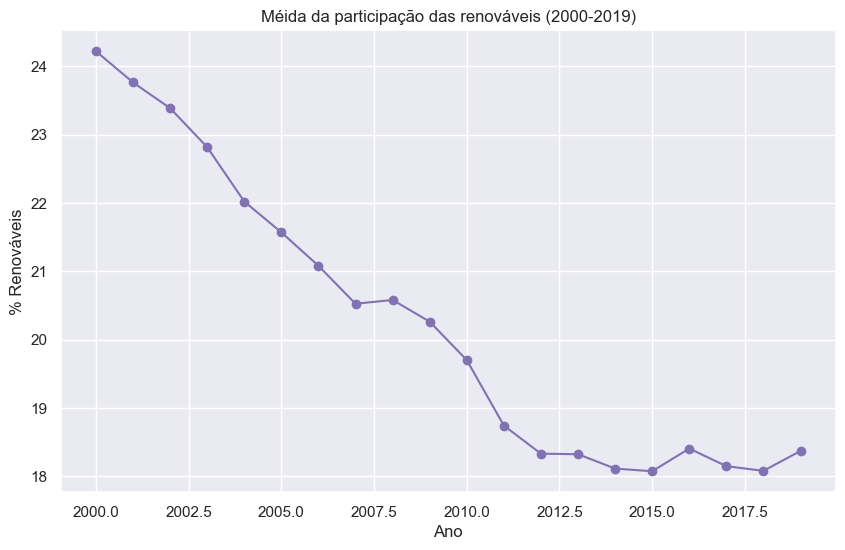

In [267]:
# Plotar o gráfico da evolução das renováveis
plt.figure(figsize=(10, 6))
plt.plot(renovaveis_media.index, renovaveis_media.values, marker='o', linestyle='-', color='m')
plt.title('Méida da participação das renováveis (2000-2019)')
plt.xlabel('Ano')
plt.ylabel('% Renováveis')
plt.grid(True)
plt.show()

Note que, na média deste grupo de países, há uma avanço enorme de renda no período. O oposto, entretanto, aconteceu com o uso das energias limpas: a participação delas despencou.

De fato, um gráfico de dispersão correlacionando estas duas variáveis para esse grupo mostra uma correlação negativa entre elas: ou seja, uma cai quando a outra avança, e vice-v

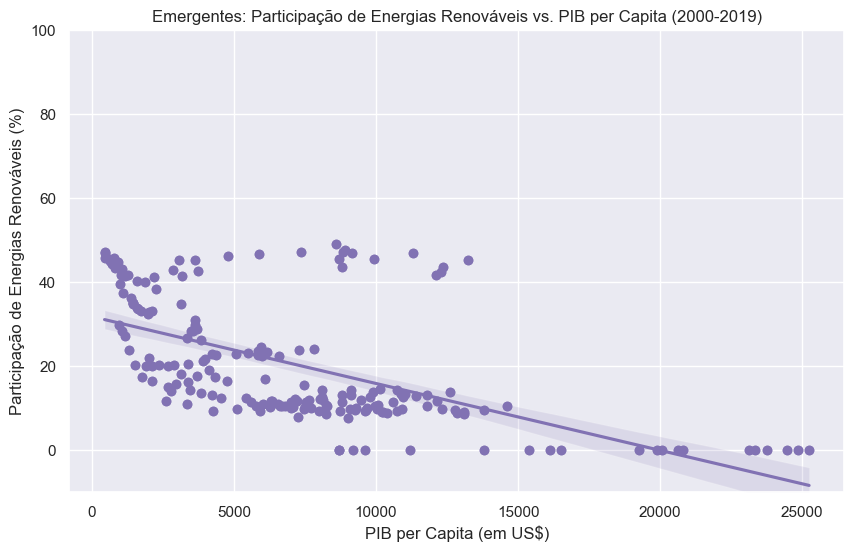

In [268]:
#Grafico de dispersão dos emergentes

plt.figure(figsize=(10, 6))
sns.regplot(x='PIB per capita', y='Renováveis %', data=Emergentes, color='m')

plt.scatter(Emergentes['PIB per capita'], Emergentes['Renováveis %'], color='m')
plt.title('Emergentes: Participação de Energias Renováveis vs. PIB per Capita (2000-2019)')
plt.xlabel('PIB per Capita (em US$)')
plt.ylabel('Participação de Energias Renováveis (%)')
plt.ylim(-10, 100)
plt.grid(True)
plt.show()

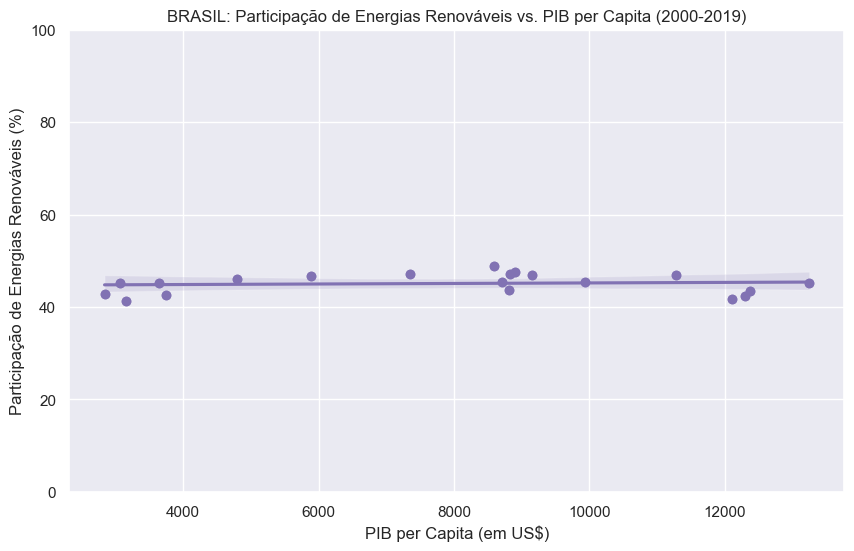

In [269]:
# Observação Brasil

Brasil = data[data['Pais']=='Brazil'].reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.regplot(x='PIB per capita', y='Renováveis %', data=Brasil, color='m')

plt.scatter(Brasil['PIB per capita'], Brasil['Renováveis %'], color='m')
plt.title('BRASIL: Participação de Energias Renováveis vs. PIB per Capita (2000-2019)')
plt.xlabel('PIB per Capita (em US$)')
plt.ylabel('Participação de Energias Renováveis (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

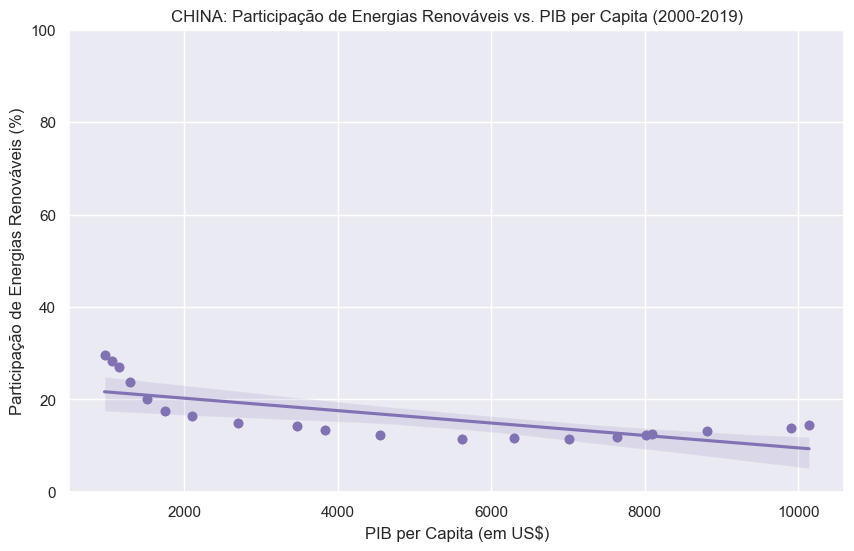

In [270]:
# Observação da China
china = data[data['Pais']=='China'].reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.regplot(x='PIB per capita', y='Renováveis %', data=china, color='m')

plt.scatter(china['PIB per capita'], china['Renováveis %'], color='m')
plt.title('CHINA: Participação de Energias Renováveis vs. PIB per Capita (2000-2019)')
plt.xlabel('PIB per Capita (em US$)')
plt.ylabel('Participação de Energias Renováveis (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

Isto, a princípio, desafia a nossa hipótese, já que não parece haver uma tendência indicando que a ampliação na participação de energias renováveis amplia a renda ou o desenvolvimento econômico, tanto quanto o inverso: ampliar a renda parece reduzir o peso das renováveis.

A pergunta é: esta tendência vale para qualquer economia, ou ela varia de acordo com diferentes perfis de países?

**2. Verificando a hipótese para países desenvolvidos**

Para testar esta pergunta, vamos agora fazer o oposto: selecionar países de alto nível de renda e ver se o comportamento entre evolção do PIB per capita e do consumo de energias renováveis é igual.

Para isso, montamos um novo grupo também reunindo os 10 países desenvolvidos mais ricos listados no ranking das maiores economias do mundo em 2022.

# 5. Conclusões